# DSCI 100 Individual Planning Report

In [25]:
library(tidyverse)
library(readr)

players <- read_csv("https://raw.githubusercontent.com/kangyili07/dsci100-project-/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/kangyili07/dsci100-project-/refs/heads/main/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## (1) Data Description

In [26]:
dim(players)
glimpse(players)

dim(sessions)
glimpse(sessions)

players_means <- players |>
  summarise(
    mean_age = mean(Age, na.rm = TRUE),
    mean_played_hours = mean(played_hours, na.rm = TRUE)
  )
players_means

players |>
  summarise(
    missing_experience   = sum(is.na(experience)),
    missing_subscribe    = sum(is.na(subscribe)),
    missing_hashedEmail  = sum(is.na(hashedEmail)),
    missing_played_hours = sum(is.na(played_hours)),
    missing_name         = sum(is.na(name)),
    missing_gender       = sum(is.na(gender)),
    missing_Age          = sum(is.na(Age))
  )
sessions |>
  summarise(
    missing_hashedEmail         = sum(is.na(hashedEmail)),
    missing_start_time          = sum(is.na(start_time)),
    missing_end_time            = sum(is.na(end_time)),
    missing_original_start_time = sum(is.na(original_start_time)),
    missing_original_end_time   = sum(is.na(original_end_time))
  )

[1] 196   7

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


[1] 1535    5

Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…


mean_age,mean_played_hours
<dbl>,<dbl>
21.13918,5.845918


missing_experience,missing_subscribe,missing_hashedEmail,missing_played_hours,missing_name,missing_gender,missing_Age
<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,2


missing_hashedEmail,missing_start_time,missing_end_time,missing_original_start_time,missing_original_end_time
<int>,<int>,<int>,<int>,<int>
0,0,2,0,2


The project uses two datasets collected from a Minecraft research server.

The `players.csv` dataset contains 196 unique players and 7 variables:

- `Age` (numeric): player age in years, with 2 missing values.  
- `played_hours` (numeric): total number of hours played on the server.  
- `experience` (categorical): self-reported game experience level.  
- `gender` (categorical): player gender.  
- `subscribe` (logical): whether the player subscribed to the game-related newsletter (response variable).  
- `hashedEmail` (character): anonymized player identifier and key for joining datasets.  
- `name` (character): player nickname, not used for prediction.  

The `sessions.csv` dataset contains 1,535 rows and 5 variables describing individual play sessions:

- `hashedEmail`: links each session to a player.  
- `start_time`, `end_time`: recorded session start and end times, with 2 missing values for `end_time`.  
- `original_start_time`, `original_end_time`: numeric time stamps, with 2 missing values for `original_end_time`.  

Each row in `players` represents one player, and each row in `sessions` represents one play session.  
In later stages, `sessions` data will be aggregated by `hashedEmail` to create behavioural variables such as the total number of sessions.

For key quantitative variables in `players.csv`, the mean age is **21.14 years** (n = 194), and the mean total play time is **5.85 hours** (n = 196).

## (2) Questions

**Broad question**  
What player characteristics and behaviours are most predictive of subscribing to the game-related newsletter, and how do these features differ between various player types?

**Specific question**  
Can player demographics (`Age`, `gender`, `experience`) and total play time (`played_hours`) predict whether a player subscribes to the newsletter?

This question is meaningful because newsletter subscription shows how engaged players are with the project. Knowing which player traits are linked to higher subscription rates helps the research team recruit more effectively and communicate with the most active players.

## (3) Exploratory Data Analysis and Visualization

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


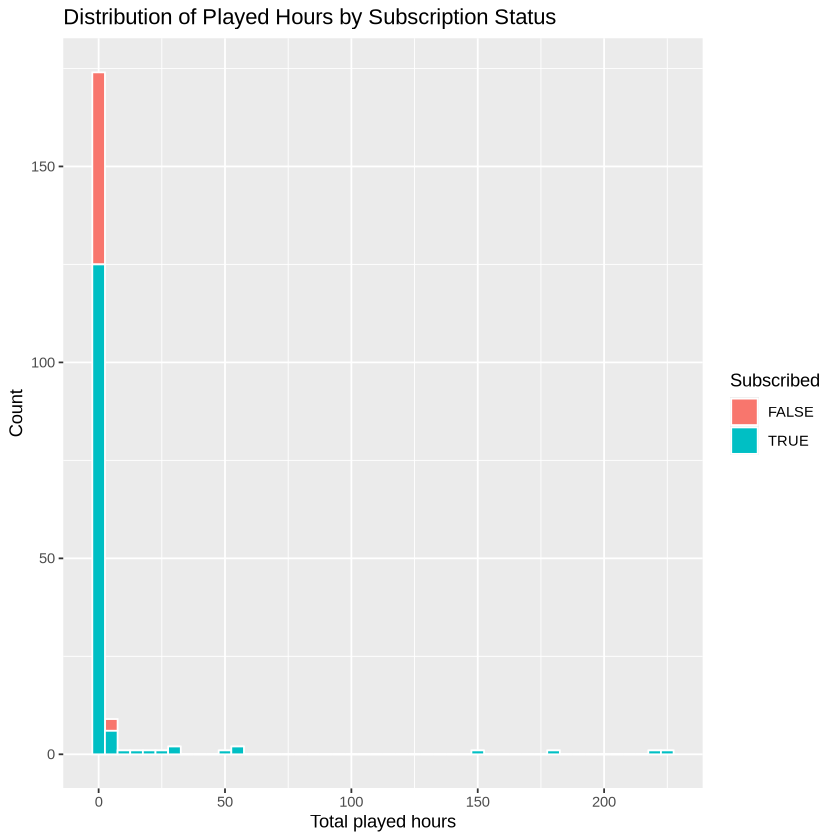

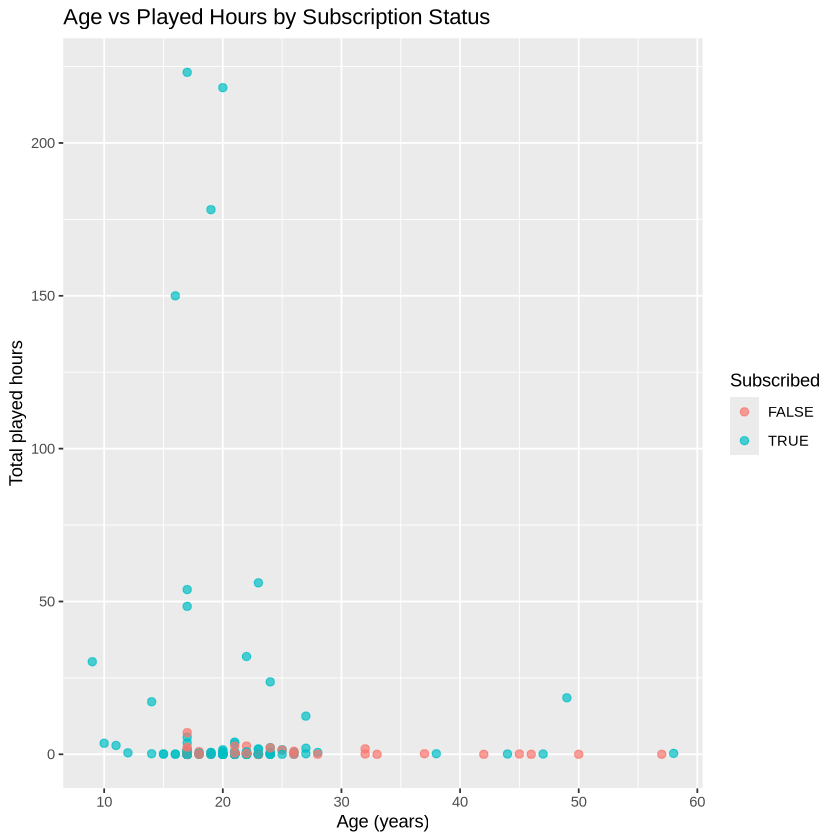

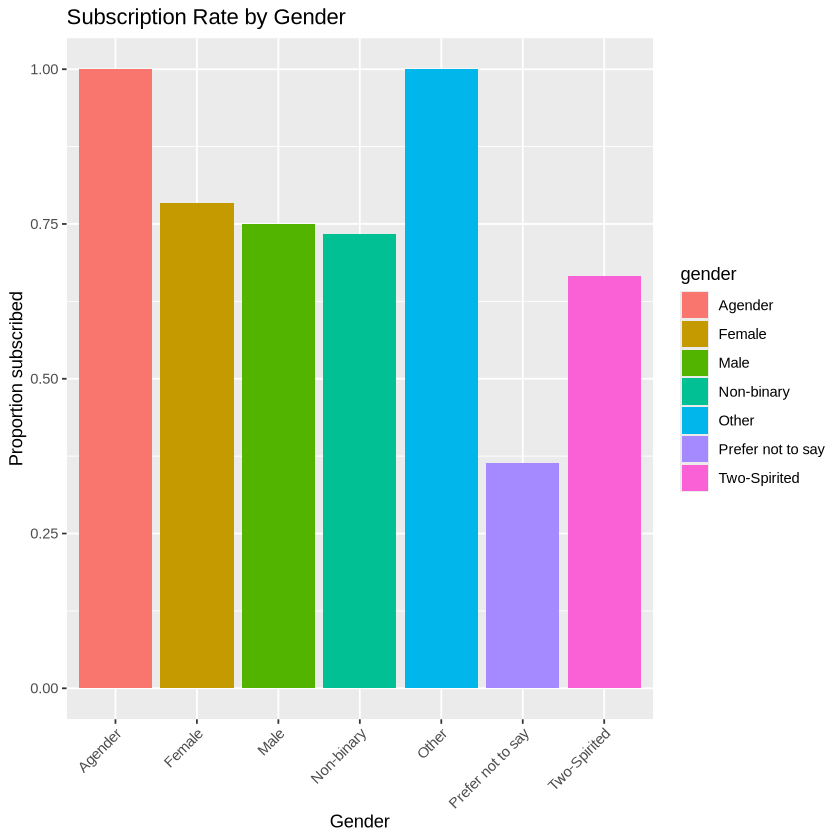

In [27]:
# Histogram
ggplot(players, aes(x = played_hours, fill = subscribe)) +
  geom_histogram(binwidth = 5, colour = "white") +
  labs(
    title = "Distribution of Played Hours by Subscription Status",
    x = "Total played hours",
    y = "Count",
    fill = "Subscribed"
  )

# Scatter
ggplot(players, aes(x = Age, y = played_hours, colour = subscribe)) +
  geom_point(alpha = 0.7, size = 2) +
  labs(
    title = "Age vs Played Hours by Subscription Status",
    x = "Age (years)",
    y = "Total played hours",
    colour = "Subscribed"
  )

# Bar by gender
players |>
  group_by(gender) |>
  summarise(subscribe_rate = mean(subscribe)) |>
  ggplot(aes(x = gender, y = subscribe_rate, fill = gender)) +
  geom_col() +
  labs(
    title = "Subscription Rate by Gender",
    x = "Gender",
    y = "Proportion subscribed"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

The histogram of `played_hours` shows a highly right-skewed distribution: most players have almost no play time, while a few heavy players play for over 100 hours. Many subscribers are in the low play-time range, but subscribers are also more common among the few heavy players, suggesting that both newly joined and highly active players tend to subscribe.

The scatter plot of `Age` versus `played_hours` shows no clear relationship between age and play time. However, the few heavy players are mainly subscribers. 

The bar plot of subscription rate by gender shows that most gender groups have high subscription rates, while the “Prefer not to say” group has the lowest rate.

Overall, these results suggest that player activity, rather than age or gender, is the strongest predictor of newsletter subscription.

## (4) Methods and Plan

Because the response variable `subscribe` is binary, I plan to use a k-nearest neighbours (k-NN) classification model to predict whether a player subscribes based on `Age`, `gender`, `experience`, and `played_hours`. k-NN classification is suitable for binary outcomes.

Before modelling, I will create a modelling dataset that keeps only the variables needed for prediction and removes rows with missing values in these variables. I will also standardize the numeric predictors (`Age` and `played_hours`) so that they are on a same scale, which is important for distance-based methods like k-NN.

The main idea and assumption of k-NN is that players who are close to each other in the predictor space tend to have similar subscription outcomes. Important limitations are that the method is sensitive to the choice of \(k\), to the scaling of predictors, and to noise in the data.

For model assessment, I plan to randomly split the data into a 70% training set and a 30% test set. Within the training set, I will use 5-fold cross-validation to choose an appropriate value of \(k\) by comparing classification accuracy. Final model performance will be evaluated on the test set using accuracy and a confusion matrix.

## (5) GitHub Repository

https://github.com/kangyili07/dsci100-project-